In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT * FROM  Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
engine.execute('SELECT * FROM  Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_date = last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

#convert last date string to date

last_date=dt.datetime.strptime(last_date, "%Y-%m-%d")

# Calculate the date 1 year ago from the last data point in the database

first_date = last_date - dt.timedelta(days=365)

print(last_date)
print(first_date)

# Perform a query to retrieve the data and precipitation scores

last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()
last_year_data
# Save the query results as a Pandas DataFrame and set the index to the date column

last_year_df = pd.DataFrame(last_year_data, columns=['date', 'precp'])
last_year_df.set_index(last_year_df['date'], inplace=True)

# # Sort the dataframe by date

last_year_df = last_year_df.sort_index()
last_year_df

2017-08-23 00:00:00
2016-08-23 00:00:00


,date,precp
date,,
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,NaN
2016-08-24,2016-08-24,2.15
2016-08-24,2016-08-24,2.28
2016-08-24,2016-08-24,2.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.00


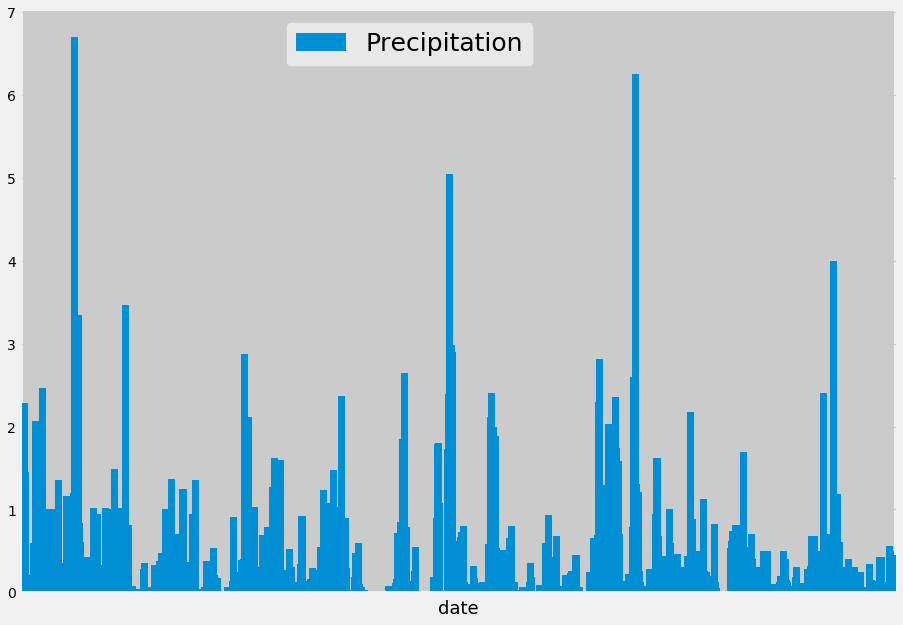

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= last_year_df.plot.bar(figsize=(14,10), width=18)
ax.set_xlabel("date", fontsize=18)

ax.set_xticklabels([])
plt.legend(['Precipitation'], fontsize=25)
ax.get_legend().set_bbox_to_anchor((0.6, 1))
plt.savefig("Images/precipitation.png")

plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats=last_year_df.describe()
summary_stats_df = pd.DataFrame(summary_stats).rename(columns = {"precp": "precipitation"})
plt.savefig("Images/describe.png")
summary_stats_df

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(func.count(Station.station)).all()
print(number_stations)

[(9,)]


In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_tobs = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').filter(Measurement.date >= first_date).all()

top_station_tobs_df = pd.DataFrame(top_station_tobs, columns=['temperature observations'])
top_station_tobs_df

,temperature observations
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


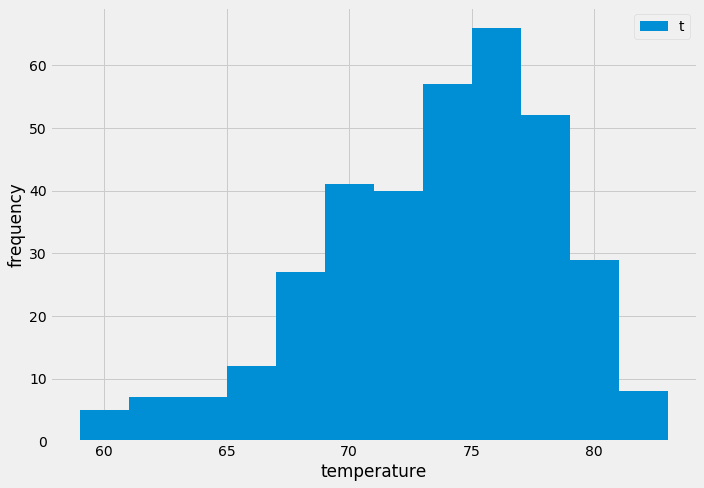

In [223]:
# plot the results as a histogram

plt.figure(figsize=(10,7))
plt.hist(top_station_tobs_df["temperature observations"], bins=12)
plt.ylabel("frequency")
plt.xlabel("temperature")
plt.legend("temperature obs")

# Save the plot
plt.savefig("Images/station-histogram.png")

# plt.tight_layout()
plt.tight_layout()

plt.show()

In [224]:
# # Temperature Analysis I

In [237]:
# return data from each month, June and December
june_data = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m",Measurement.date) == '06').all()
december_data = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m",Measurement.date) == '12').all()

# convert data to DataFrames to label them 
june_data_df = pd.DataFrame(june_data,columns=["Date","Temperature"])
december_data_df = pd.DataFrame(december_data,columns=["Date","Temperature"])
june_data_df["Month"] = "June"
december_data_df["Month"] = "December"
temp_df = pd.concat([june_data_df,december_data_df], ignore_index=True)

# calculate the average for both June and December
avg_temp_month = temp_df.groupby("Month").mean()
avg_temp_month

,Temperature
Month,
December,71.041529
June,74.944118


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

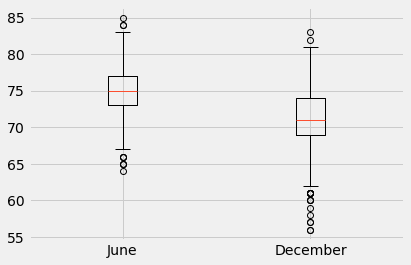

In [235]:
# Use t-test to determine if the average temperatures between June and December are statistically different. 

box_data = [june_df["Temperature"],december_df["Temperature"]]
plt.boxplot(box_data,labels=['June', 'December']);
stats.ttest_ind(june_df["Temperature"], december_df["Temperature"])

In [236]:
# From the t-test, the p-value is less than 0.05.  This means that the average temp between June and Decemberare statistically different

## Bonus Challenge Assignment

In [78]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [102]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_results = calc_temps(first_date, last_date)
print(temp_results)

[(58.0, 74.57894736842105, 87.0)]


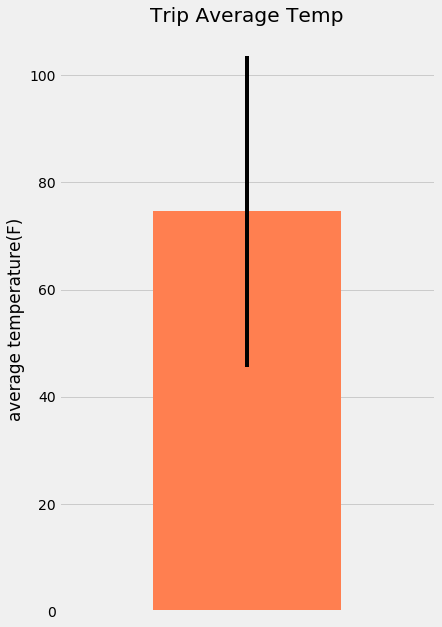

<Figure size 432x288 with 0 Axes>

In [229]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

temp_results_df = pd.DataFrame(temp_results, columns=["tmin", "tavg", "tmax"])

# plot the average temp 
plt.figure(figsize=(6,10))
ax=temp_results_df["tavg"].plot.bar(yerr=(temp_results_df["tmax"]-temp_results_df["tmin"]), color="coral")
plt.title("Trip Average Temp")
plt.ylabel("average temperature(F)")
ax.axes.get_xaxis().set_visible(False)
plt.show()

# Save the plot
plt.tight_layout()
plt.savefig("Images/avg_temp.png")
plt.show()

In [238]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rainfall_query = [func.count(Measurement.prcp),Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation]
rainfall=session.query(*rainfall_query).filter(Measurement.station==Station.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= first_date).filter(Measurement.date <= last_date).\
    order_by(func.count(Measurement.prcp).desc()).all()
rainfall

[(358, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (351,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (342, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (327,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 (313,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (264,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (60, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [133]:
# Put in dataframe for easy readability
pd.DataFrame(rainfall,
             columns=["Station","Station_Name", "Total_Rainfall", "Latitude", "Longitude", "Elevation"]
            ).sort_values("Total_Rainfall",ascending=False)

,Station,Station_Name,Total_Rainfall,Latitude,Longitude,Elevation
4,313,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
0,358,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,351,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,60,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
3,327,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
5,264,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,342,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6


In [127]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [138]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

trip_start_date = '2017-02-28'
trip_end_date = '2017-03-05'


# Use the start and end date to create a range of dates
start_date = dt.datetime.strptime(trip_start_date,'%Y-%m-%d')
end_date = dt.datetime.strptime(trip_end_date,'%Y-%m-%d') 
delta = end_date - start_date
normals = []

for i in range(delta.days + 1):
    day = start_date + dt.timedelta(days=i)
    # Strip off the year and save a list of %m-%d strings
    month_day = dt.datetime.strftime(day,'%m-%d')
    normals.append(month_day)

normals

# Loop through the list of %m-%d strings and calculate the normals for each date
normal_list = []
for day in normals:
    normal_list.append(daily_normals(day)[0])
    
normal_list

[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [139]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normal_list,columns=["tmin","tavg","tmax"],index=[normals])
normals_df.index = normals_df.index.get_level_values(0)
normals_df

,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


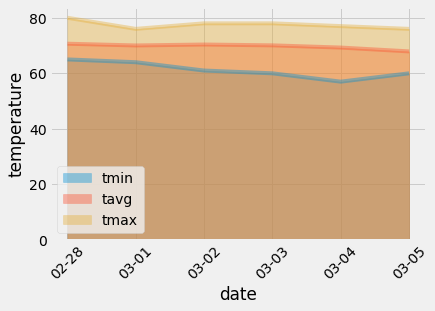

In [153]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot(kind="area",stacked=False,rot=45,alpha=.4)
plt.xlabel("date")
plt.ylabel("temperature")
plt.savefig("Images/daily-normals.png")
plt.show()